<a name="top"></a>
## Contents

* [Setup](#Setup)
* [References](#References)
* [1/I](#1NAI)
* [1/C](#1NAC)
* [1/J](#1NAJ)
* [2/C](#2NAC)

(WIP, more to follow)

<a id="top"></a>

## Setup

In this notebook, we will run the MOCMA optimizer for functions described in the Convex Quadratic Bi-Objective benchmark [1] (here abbreviated as MOQ).
For these functions, an analytical form of the optimal Pareto front is known.

For each function, we will run 4 different configurations of the MOCMA optimizer for 5 trials with a maximum of 100.000 function evaluations.

In [1]:
import dataclasses

import math
import numpy as np

from anguilla.fitness import benchmark

from experiment import TrialParameters, run_trials, population_plot_2d, pareto_front_plot_2d, runtime_summary, volume_summary

In [12]:
# 1) Configurable global settings

# Number of trials
N_TRIALS = 5

# Number of dimensions
N_DIMENSIONS = 10

# Number of parents
N_PARENTS = 20

INITIAL_STEP_SIZE = 3.0

# Condition number
K = 1e3

# For reproducible results we set a base seed to create the seed 
# sequence used to generate children seeds for each independent trial
SEED = 4566785

# Maximum number of evaluations to run the optimizer for
MAX_EVALUATIONS = 100000

# 2) Other global values

# Store common parameters which are customized using dataclasses.replace
def get_base_params(key: str):
    return TrialParameters(
                benchmark.MOQ,
                fn_args=(key, N_DIMENSIONS,),
                fn_kwargs={"k": K},
                # All instances of the benchmark function will be
                # created with this seed
                fn_rng_seed=SEED,
                n_parents=N_PARENTS,
                initial_step_size=INITIAL_STEP_SIZE,
                max_evaluations=MAX_EVALUATIONS,
            )

def run(key: str, **parameter_replacements: dict):
    params = dataclasses.replace(get_base_params(key), **parameter_replacements)
    results = run_trials(params, seed=SEED, n_trials=N_TRIALS)
    runtime_summary(results)
    volume_summary(results)
    return population_plot_2d(results)


def pareto_front(key: str):
    parameters = PARAMETERS[key]
    if parameters.fn_rng_seed is not None:
        parameters.fn_kwargs["rng"] = np.random.default_rng(parameters.fn_rng_seed)
    fn = parameters.fn_cls(*parameters.fn_args, **parameters.fn_kwargs)
    return pareto_front_plot_2d(fn)

<a name="1NAI"></a>
## 1/I
[Back to top](#top)

### Individual-based

Running 5 trials using 5 processes with chunk size of 1.
Average wall-clock time: total = 33.87s, ask = 25.46s, tell = 2.64s, eval = 5.77s
No reference point was provided.


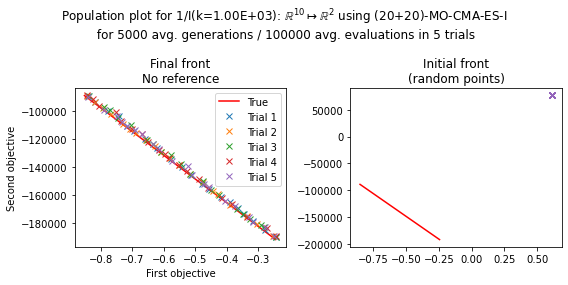

In [15]:
fig = run("1/I", success_notion="individual")

### Population-based

Running 5 trials using 5 processes with chunk size of 1.
Average wall-clock time: total = 36.35s, ask = 26.73s, tell = 3.20s, eval = 6.42s
No reference point was provided.


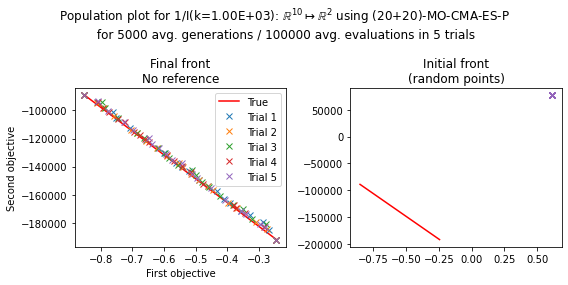

In [14]:
fig = run("1/I")

### Steady-state, individual-based

Running 5 trials using 5 processes with chunk size of 1.
Average wall-clock time: total = 73.72s, ask = 39.34s, tell = 22.32s, eval = 12.07s
No reference point was provided.


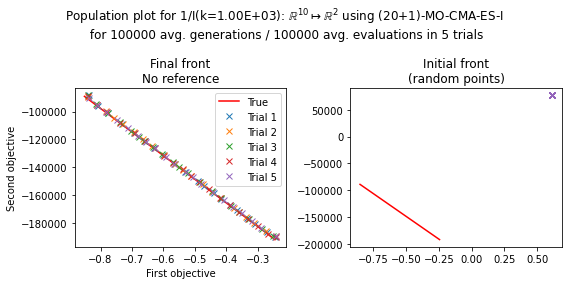

In [17]:
fig = run("1/I", success_notion="individual", n_offspring=1)

### Steady-state, population-based

Running 5 trials using 5 processes with chunk size of 1.
Average wall-clock time: total = 82.52s, ask = 44.04s, tell = 24.36s, eval = 14.12s
No reference point was provided.


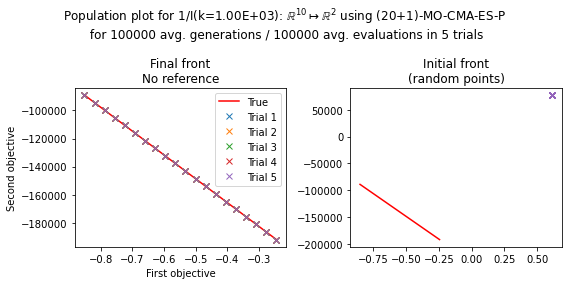

In [18]:
fig = run("1/I", n_offspring=1)

<a name="1NAC"></a>
## 1/C
[Back to top](#top)

### Individual-based

Running 5 trials using 5 processes with chunk size of 1.
Average wall-clock time: total = 39.47s, ask = 29.73s, tell = 3.02s, eval = 6.72s
No reference point was provided.


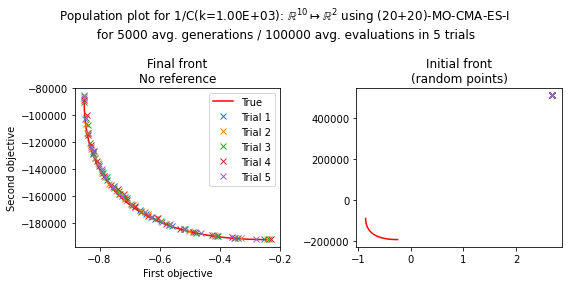

In [19]:
fig = run("1/C", success_notion="individual")

### Population-based

Running 5 trials using 5 processes with chunk size of 1.
Average wall-clock time: total = 35.10s, ask = 26.10s, tell = 3.14s, eval = 5.87s
No reference point was provided.


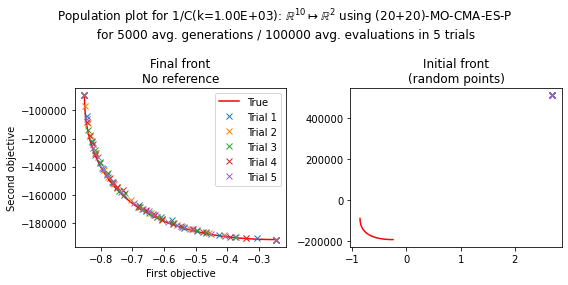

In [20]:
fig = run("1/C")

### Steady-state, individual-based

Running 5 trials using 5 processes with chunk size of 1.
Average wall-clock time: total = 76.48s, ask = 40.85s, tell = 23.13s, eval = 12.50s
No reference point was provided.


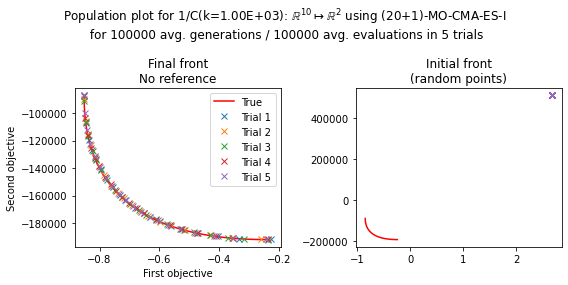

In [21]:
fig = run("1/C", success_notion="individual", n_offspring=1)

### Steady-state, population-based

Running 5 trials using 5 processes with chunk size of 1.
Average wall-clock time: total = 112.06s, ask = 60.21s, tell = 33.14s, eval = 18.71s
No reference point was provided.


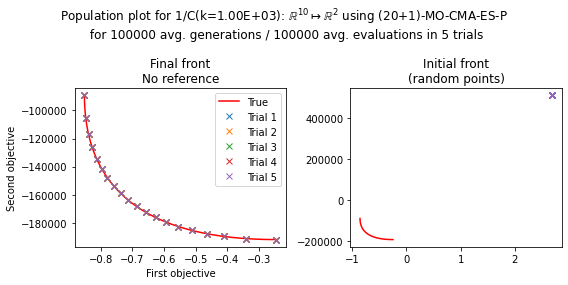

In [22]:
fig = run("1/C", n_offspring=1)

<a name="1NAJ"></a>
## 1/J
[Back to top](#top)

### Individual-based

Running 5 trials using 5 processes with chunk size of 1.
Average wall-clock time: total = 34.34s, ask = 25.85s, tell = 2.64s, eval = 5.85s
No reference point was provided.


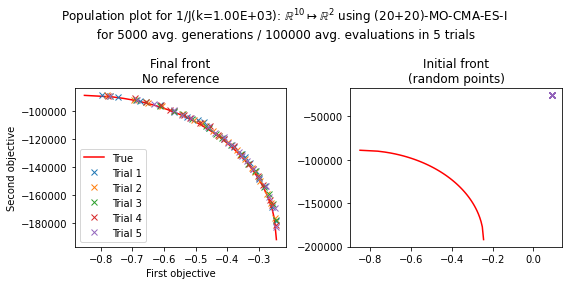

In [24]:
fig = run("1/J", success_notion="individual")

### Population-based

We observe that unlike with the individual-based notion of success, the extrema are populated.

Running 5 trials using 5 processes with chunk size of 1.
Average wall-clock time: total = 38.80s, ask = 28.51s, tell = 3.37s, eval = 6.92s
No reference point was provided.


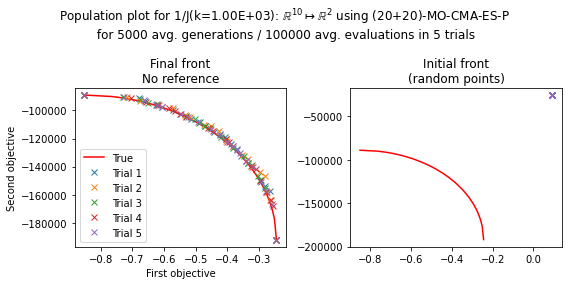

In [25]:
fig = run("1/J")

### Steady-state, individual-based

Running 5 trials using 5 processes with chunk size of 1.
Average wall-clock time: total = 104.23s, ask = 55.69s, tell = 31.29s, eval = 17.25s
No reference point was provided.


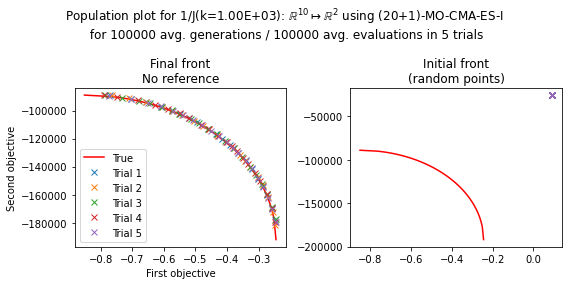

In [26]:
fig = run("1/J", success_notion="individual", n_offspring=1)

### Steady-state, population-based

Running 5 trials using 5 processes with chunk size of 1.
Average wall-clock time: total = 104.71s, ask = 55.91s, tell = 30.57s, eval = 18.23s
No reference point was provided.


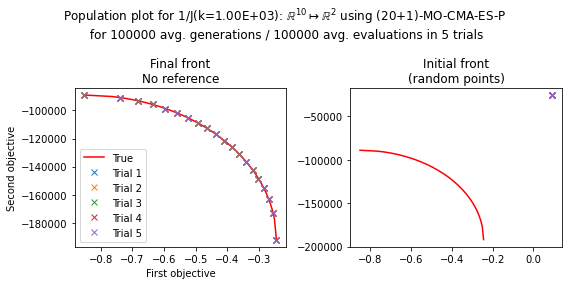

In [27]:
fig = run("1/J", n_offspring=1)

<a name="2NAC"></a>
## 2/C
[Back to top](#top)

### Individual-based

Running 5 trials using 5 processes with chunk size of 1.
Average wall-clock time: total = 52.67s, ask = 39.44s, tell = 4.22s, eval = 9.02s
No reference point was provided.


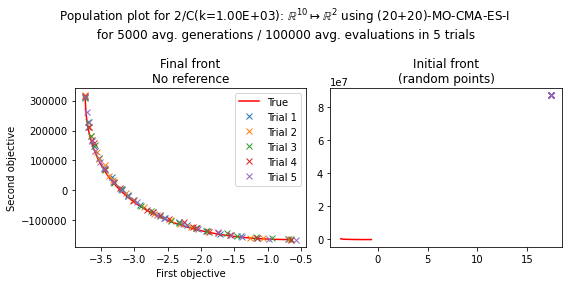

In [28]:
fig = run("2/C", success_notion="individual")

### Population-based

Running 5 trials using 5 processes with chunk size of 1.
Average wall-clock time: total = 59.79s, ask = 44.16s, tell = 5.34s, eval = 10.30s
No reference point was provided.


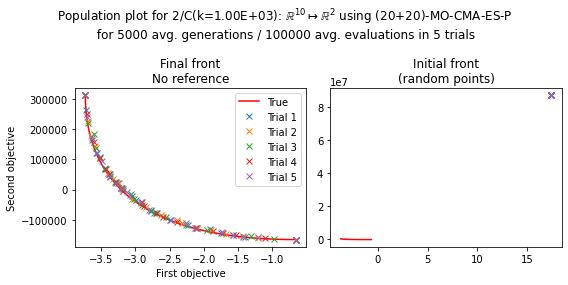

In [29]:
fig = run("2/C")

### Steady-state, individual-based

Running 5 trials using 5 processes with chunk size of 1.
Average wall-clock time: total = 95.49s, ask = 50.64s, tell = 29.21s, eval = 15.64s
No reference point was provided.


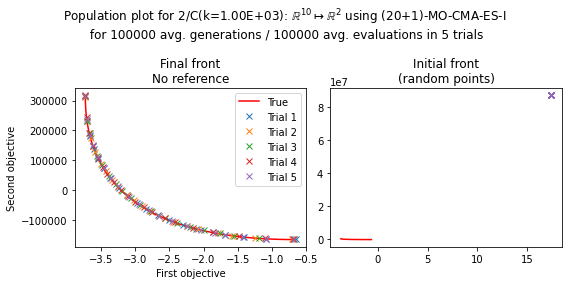

In [30]:
fig = run("2/C", success_notion="individual", n_offspring=1)

### Steady-state, population-based

Running 5 trials using 5 processes with chunk size of 1.
Average wall-clock time: total = 97.32s, ask = 51.84s, tell = 29.06s, eval = 16.42s
No reference point was provided.


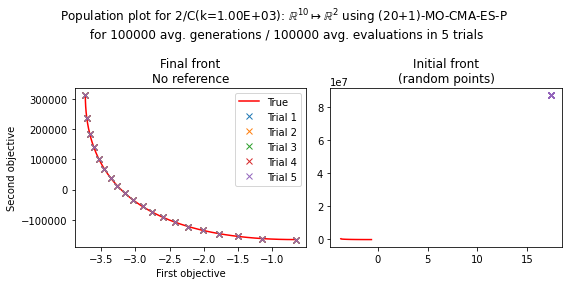

In [31]:
fig = run("2/C", n_offspring=1)

<a name="3AC"></a>
## 3|C
[Back to top](#top)

### Individual-based

In [ ]:
fig = run("3|C", success_notion="individual")

### Population-based

In [ ]:
fig = run("3|C")

### Steady-state, individual-based

In [ ]:
fig = run("3|C", success_notion="individual", n_offspring=1)

### Steady-state, population-based

In [ ]:
fig = run("3|C", n_offspring=1)

<a name="4AC"></a>
## 4|C
[Back to top](#top)

### Individual-based

In [ ]:
fig = run("4|C", success_notion="individual")

### Population-based

In [ ]:
fig = run("4|C")

### Steady-state, individual-based

In [ ]:
fig = run("4|C", success_notion="individual", n_offspring=1)

### Steady-state, population-based

In [ ]:
fig = run("4|C", n_offspring=1)

<a name="5AC"></a>
## 5|C
[Back to top](#top)

### Individual-based

In [ ]:
fig = run("5|C", success_notion="individual")

### Population-based

In [ ]:
fig = run("5|C")

### Steady-state, individual-based

In [ ]:
fig = run("5|C", success_notion="individual", n_offspring=1)

### Steady-state, population-based

In [ ]:
fig = run("5|C", n_offspring=1)

<a name="6AC"></a>
## 6|C
[Back to top](#top)

### Individual-based

In [ ]:
fig = run("6|C", success_notion="individual")

### Population-based

In [ ]:
fig = run("6|C")

### Steady-state, individual-based

In [ ]:
fig = run("6|C", success_notion="individual", n_offspring=1)

### Steady-state, population-based

In [ ]:
fig = run("6|C", n_offspring=1)

## References
[Back to top](#top)

[1] Glasmachers, T. Challenges of convex quadratic bi-objective benchmark problems. En Proceedings of the Genetic and Evolutionary Computation Conference. 2019. p. 559-567.